In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from prepare import *
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from metrics import *
from sklearn.ensemble import RandomForestRegressor
from trasnformer import *

warnings.simplefilter("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set(style="darkgrid")

In [3]:
def invert_sq(x):
    return x ** 2

In [65]:
data = pd.read_csv("../data/train.csv")

y = data["Sales"]
X = data

#X, y = remove_outliers_split_2(X, y)

transformer = Transformer()

transformer.fit(X)
X = transformer.transform(X)

Regression score and coeff 0.6080210054110256 [0.5374021]


In [5]:
X_train, X_test, y_train_sales, y_test_sales = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train_sales > 3000
y_test = y_test_sales > 3000

X_train.head()

Name         Brand  \
3214           Массажер электрический OVAL/вибромассажер   Juliabeauty   
8203    Воздухонагреватель электрический RedVerg RD-EHC3       RedVerg   
13925  Фреза для маникюра для снятия старого покрытия...       HDFREZA   
18650                 Антимоскитный светильник LED 3 Вт.       Ergolux   
10806  Массажная роликовая подушка с ИК - прогревом и...  Healthy Life   

                                   Seller  Comments  Final price  Max price  \
3214   Калашников Андрей Александрович ИП      24.0       1890.0     1890.0   
8203                      ТМК ОПТТОРГ ООО       7.0       2689.0     2689.0   
13925  Мыслицкий Владимир Вячеславович ИП       3.0        149.0      149.0   
18650       Энергосистемы и Технологии АО       0.0        549.0      549.0   
10806                     КМД-ПАРТНЁР ООО       1.0       2286.0     2378.0   

       Min price  Average price  Days in stock  Days with sales  Rating  \
3214      1890.0    1890.000000           31.0               29     2.5   
8203      2372.0    2445.333333            7.0                8     2.5   
13925      149.0     149.000000           17.0                8     2.5   
18650      549.0     549.000000           31.0                0    -2.5   
10806     2012.0    2231.600000           15.0                4     2.5   

       Basic Sale  Basic Sale Price  Base price  Approximate  Discount  \
3214         55.0            2520.0      5600.0   246.852537       0.0   
8203         35.0            2689.0      4138.0    19.590338     317.0   
13925         0.0             149.0       149.0    19.590338       0.0   
18650        50.0             549.0      1098.0     0.016099       0.0   
10806        50.0            2286.0      4573.0     5.182402     366.0   

               Section             SubSection             ExtraSection  \
3214   Бытовая техника     Красота и здоровье  Массажеры электрические   
8203   Бытовая техника  Климатическая техника           Тепловые пушки   
13925  Бытовая техника     Красота и здоровье       Фрезы для маникюра   
18650  Бытовая техника        Садовая техника       Лампы от насекомых   
10806  Бытовая техника     Красота и здоровье  Массажеры электрические   

       Price scale  
3214     -0.490341  
8203     -0.473523  
13925    -0.460697  
18650    -0.361909  
10806    -0.488433

In [6]:
y_train[y_train == True]

19743    True
24125    True
2977     True
5422     True
18475    True
11015    True
17099    True
17252    True
11982    True
12447    True
916      True
10124    True
23084    True
4365     True
12537    True
9420     True
18690    True
18146    True
204      True
23386    True
21330    True
13500    True
23483    True
Name: Sales, dtype: bool

In [7]:
cat_features = np.where(X_train.loc[:, X_train.columns.values].dtypes == "object")[0]


model_CBC = CatBoostClassifier()

model_CBC.fit(X_train, y_train, cat_features=cat_features)

Learning rate set to 0.037062
0:	learn: 0.5542273	total: 185ms	remaining: 3m 4s
1:	learn: 0.4590570	total: 209ms	remaining: 1m 44s
2:	learn: 0.3684468	total: 258ms	remaining: 1m 25s
3:	learn: 0.2916561	total: 304ms	remaining: 1m 15s
4:	learn: 0.2426085	total: 347ms	remaining: 1m 9s
5:	learn: 0.2033083	total: 394ms	remaining: 1m 5s
6:	learn: 0.1681570	total: 441ms	remaining: 1m 2s
7:	learn: 0.1417287	total: 453ms	remaining: 56.1s
8:	learn: 0.1196712	total: 470ms	remaining: 51.7s
9:	learn: 0.0945155	total: 486ms	remaining: 48.2s
10:	learn: 0.0763121	total: 533ms	remaining: 47.9s
11:	learn: 0.0616978	total: 578ms	remaining: 47.6s
12:	learn: 0.0519851	total: 629ms	remaining: 47.7s
13:	learn: 0.0434823	total: 678ms	remaining: 47.7s
14:	learn: 0.0361423	total: 738ms	remaining: 48.4s
15:	learn: 0.0310425	total: 783ms	remaining: 48.2s
16:	learn: 0.0259867	total: 829ms	remaining: 48s
17:	learn: 0.0225314	total: 880ms	remaining: 48s
18:	learn: 0.0190953	total: 926ms	remaining: 47.8s
19:	learn: 0

In [8]:
res = model_CBC.predict(X_train)

In [9]:
res[res == True]

array([], dtype=object)

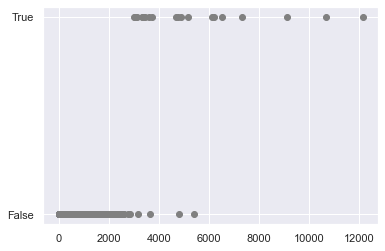

In [10]:
plt.scatter(y_train_sales, res, color='gray')

In [71]:
X_reg = np.array([(X["Days with sales"] ** 0.5).values, (X["Comments"] ** 0.5).values, (X["Price scale"]).values])
# print(X)
X_reg = X_reg.T

print(X_reg)
y = np.log1p(data["Sales"])

[[ 1.41421356  0.         -0.01797272]
 [ 1.73205081  2.23606798 -0.41759138]
 [ 1.41421356  0.         -0.43781601]
 ...
 [ 1.73205081  1.41421356 -0.20726598]
 [ 2.23606798  0.         -0.45696207]
 [ 5.09901951  5.83095189  0.36185699]]


In [72]:
regressor = LinearRegression().fit(X_reg, y)
print(regressor.score(X_reg, y), regressor.coef_)

0.9146315997610917 [ 0.91024075  0.06249238 -0.08223429]


In [73]:
res = regressor.predict(X_reg)

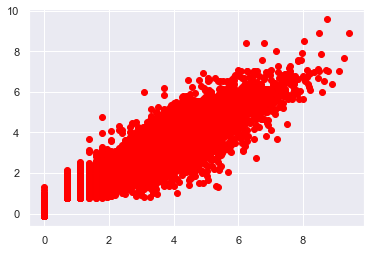

In [74]:
plt.scatter(y, res, color='red')

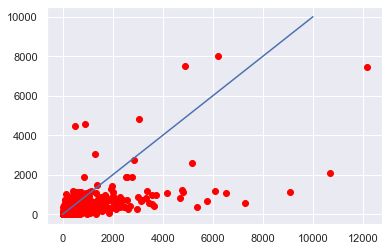

In [75]:
plt.plot(np.linspace(0, 10000, 2), np.linspace(0, 10000, 2), c = 'b')

plt.scatter(invert(y), np.clip(invert(res), 0, 8000), color='red')

In [77]:
evaluate(regressor, X_reg, y)

SMAPE: 42.73425327309093
